# Exploratory Analysis of a Real-world application

Simplified EDA Problem

Analysing Customer Sales Behaviour. You are provided with transactional data from a retail store. The goal of this analysis is to
explore the dataset and extract valuable insights into customer purchasing behaviour, sales trends, and product performance. You will answer a set of specific questions to uncover patterns that can help improve business strategies.

Problem

Perform exploratory data analysis to gain insights into sales performance and customer behaviour. The objective is to provide actionable insights by answering a series of specific sub-questions.

## Data Cleaning and Preparation

Q1. Data Cleaning and Preparation

Clean the dataset by handling missing values, removing duplicates, and filtering any irrelevant data (e.g., negative quantities).

Summarize the dataset by providing descriptive statistics (e.g., mean, median, standard deviation) for relevant columns like Quantity UnitPrice, and InvoiceDate.

Loading necessary libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/content/Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Inference

There are totally 8 columns and some column contains null values (description) in the dataset. Important columns can be retained for further analysis and rest will be removed.

In [9]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


In [12]:
data.shape

(536641, 8)

Inference

There are 536641 rows with 8 columns in the dataset.

Removing the duplicate entries

In [8]:
data.drop_duplicates(inplace=True)

In [15]:
data[data.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Checking Inconsistent Data Entries

In [13]:
for column in data.columns:
    print(f"{column}: {pd.api.types.infer_dtype(data[column])}")

InvoiceNo: mixed-integer
StockCode: mixed-integer
Description: mixed-integer
Quantity: integer
InvoiceDate: datetime64
UnitPrice: floating
CustomerID: floating
Country: string


Inference

Dataype -> mixed-integer will create an issue in the future analysis. Need to convert this datatype.

Checking the descriptive statistics

In [14]:
data.describe(exclude = ['object', 'datetime64']).transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.00,13939.00,15145.00,16784.00,18287.0


Inference

There is a negative values in both Quantity and UnitPrice column, so both the column should be inspected.

Percentage of null entries in a single column

In [17]:
print(f"Missing Value -> {np.round(data[data.isnull().any(axis=1)].shape[0]*100/data.shape[0], 1)}%")

Missing Value -> 25.2%


Fetching rows with null values in Description column

In [18]:
data[data.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


Dropping Null Values and Reseting Index

In [19]:
data = data.dropna().reset_index(drop=True)

In [21]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Inference

Now the null values are removed for further analysis.

**Observations**

There're 135037 rows (≈ 25%) that contain one/more NULL values.

NULL values are there for two columns - Description & CustomerID.

Entries that have NULL values for Description also have NULL values in CustomerID.

CustomerID is one of the most essential columns. So, the entries containing NULL values in the CustomerID column don't contribute to our analysis. Hence, it's best to drop these rows.


Converting the mixed-integer datatype to string

In [24]:
data['StockCode'] = data['StockCode'].apply(lambda x: str(x))
data['CustomerID'] = data['CustomerID'].apply(lambda x: str(int(x)))
data['Description'] = data['Description'].apply(lambda x: str(x))

In [25]:
for column in data.columns:
    print(f"{column}: {pd.api.types.infer_dtype(data[column])}")

InvoiceNo: mixed-integer
StockCode: string
Description: string
Quantity: integer
InvoiceDate: datetime64
UnitPrice: floating
CustomerID: string
Country: string


Checking Duplicated Entries

In [26]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Inference

There is no duplicate values in the dataset.

Removing the rows - Negative Values

In [27]:
data.drop(data[(data['Quantity'] < 0) | (data['UnitPrice'] < 0)].index, inplace= True)

In [30]:
data.shape

(392732, 8)

# Sales Analysis

Q2. Sales Analysis

What are the top 10 best-selling products by quantity?

What is the total revenue generated by each product? (Hint: Use Quantity * UnitPrice to calculate total sales).

What is the monthly revenue trend? Are there noticeable patterns or peaks in sales over time?

Function to map the stock code to description, for checking out finally

In [66]:
def stockcode_to_description(data):
    stock_desc_map = data.groupby('StockCode')['Description'].agg(lambda x: x.value_counts().index[0]).to_dict()

    print("StockCode to Product Description Mapping (Top 20):")
    print('--------------------------------------------------')
    for code, desc in list(stock_desc_map.items())[:20]:
        print(f"StockCode: {code} - Description: {desc}")

    return stock_desc_map

Function for the top 10 products by quantity

In [71]:
def top_10_products_by_quantity(data):

    print("\n\n")
    top_products = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
    print("Top 10 best-selling products by quantity:")
    print("-----------------------------------------")
    print(top_products)

    print("\n")
    plt.figure(figsize=(12, 6))
    top_products.plot(kind='bar')
    plt.title('Top 10 Best-Selling Products by Quantity')
    plt.xlabel('Stock Code')
    plt.ylabel('Total Quantity Sold')
    plt.tight_layout()
    plt.show()


Function to calculate the revenue

In [44]:
def revenue_by_product(data):
    data['TotalSales'] = data['Quantity'] * data['UnitPrice']
    revenue_per_product = data.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False)
    print("Total revenue generated by each product (top 10):")
    print(revenue_per_product.head(10))

    plt.figure(figsize=(12, 6))
    revenue_per_product.head(10).plot(kind='bar')
    plt.title('Top 10 Products by Total Revenue')
    plt.xlabel('Stock Code')
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()

Function to see the monthly trend

In [45]:
def monthly_revenue_trend(df):
    data['TotalSales'] = data['Quantity'] * data['UnitPrice']
    data['Month'] = data['InvoiceDate'].dt.to_period('M')
    monthly_sales = data.groupby('Month')['TotalSales'].sum()

    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Revenue Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()

    # Identifying patterns or peaks
    peak_month = monthly_sales.idxmax()
    lowest_month = monthly_sales.idxmin()
    print(f"Peak sales month: {peak_month}")
    print(f"Lowest sales month: {lowest_month}")

    # Calculating month-over-month growth
    monthly_growth = monthly_sales.pct_change()
    print("\nMonth-over-month growth rate:")
    print(monthly_growth)

In [55]:
def lookup_stock_code(data, stock_code):

    product_info = data[data['StockCode'] == stock_code]

    if product_info.empty:
        return f"No product found with StockCode: {stock_code}"

    description = product_info['Description'].mode().iloc[0]
    total_quantity = product_info['Quantity'].sum()
    total_revenue = (product_info['Quantity'] * product_info['UnitPrice']).sum()
    num_transactions = product_info['InvoiceNo'].nunique()

    return f"""
    StockCode: {stock_code}
    Description: {description}
    Total Quantity Sold: {total_quantity}
    Total Revenue: £{total_revenue:.2f}
    Number of Transactions: {num_transactions}
    """

In [58]:
def run_sales_analysis(data):
    stock_desc_map = stockcode_to_description(data)
    top_10_products_by_quantity(data)
    revenue_by_product(data)
    monthly_revenue_trend(data)

    print("\nLooking up a specific stock code:")
    print(lookup_stock_code(data, '23843'))

StockCode to Product Description Mapping (Top 20):
--------------------------------------------------
StockCode: 10002 - Description: INFLATABLE POLITICAL GLOBE 
StockCode: 10080 - Description: GROOVY CACTUS INFLATABLE
StockCode: 10120 - Description: DOGGY RUBBER
StockCode: 10123C - Description: HEARTS WRAPPING TAPE 
StockCode: 10124A - Description: SPOTS ON RED BOOKCOVER TAPE
StockCode: 10124G - Description: ARMY CAMO BOOKCOVER TAPE
StockCode: 10125 - Description: MINI FUNKY DESIGN TAPES
StockCode: 10133 - Description: COLOURING PENCILS BROWN TUBE
StockCode: 10135 - Description: COLOURING PENCILS BROWN TUBE
StockCode: 11001 - Description: ASSTD DESIGN RACING CAR PEN
StockCode: 15030 - Description: FAN BLACK FRAME 
StockCode: 15034 - Description: PAPER POCKET TRAVELING FAN 
StockCode: 15036 - Description: ASSORTED COLOURS SILK FAN
StockCode: 15039 - Description: SANDALWOOD FAN
StockCode: 15044A - Description: PINK PAPER PARASOL 
StockCode: 15044B - Description: BLUE PAPER PARASOL 
Stoc

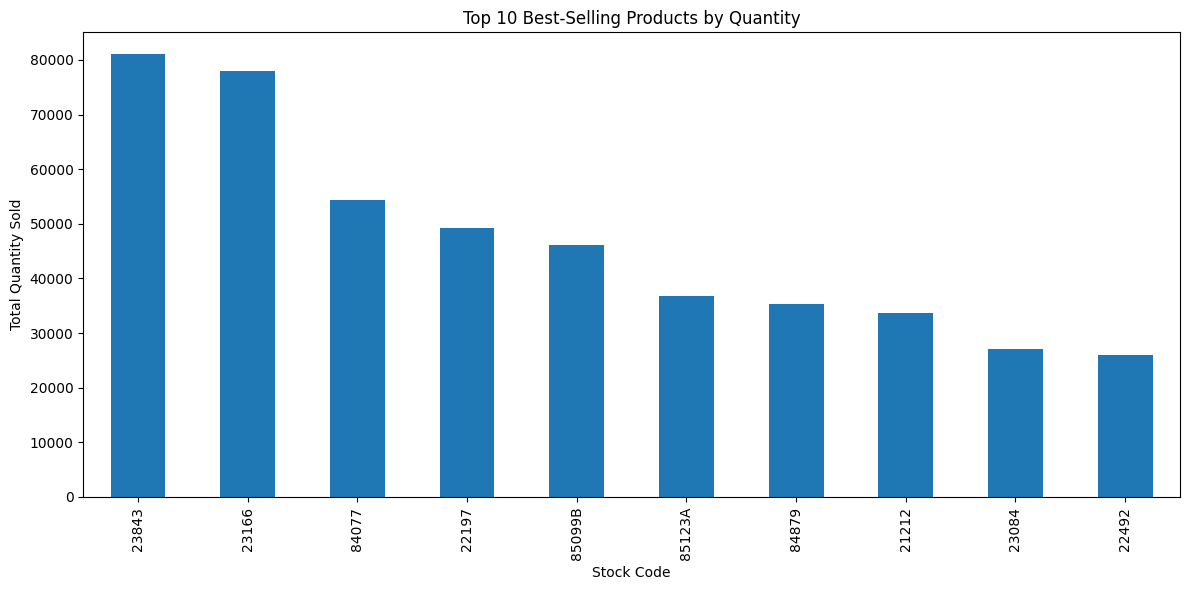

Total revenue generated by each product (top 10):
StockCode
23843     168469.60
22423     142264.75
85123A    100547.45
85099B     85040.54
23166      81416.73
POST       77803.96
47566      68785.23
84879      56413.03
M          53419.93
23084      51251.24
Name: TotalSales, dtype: float64


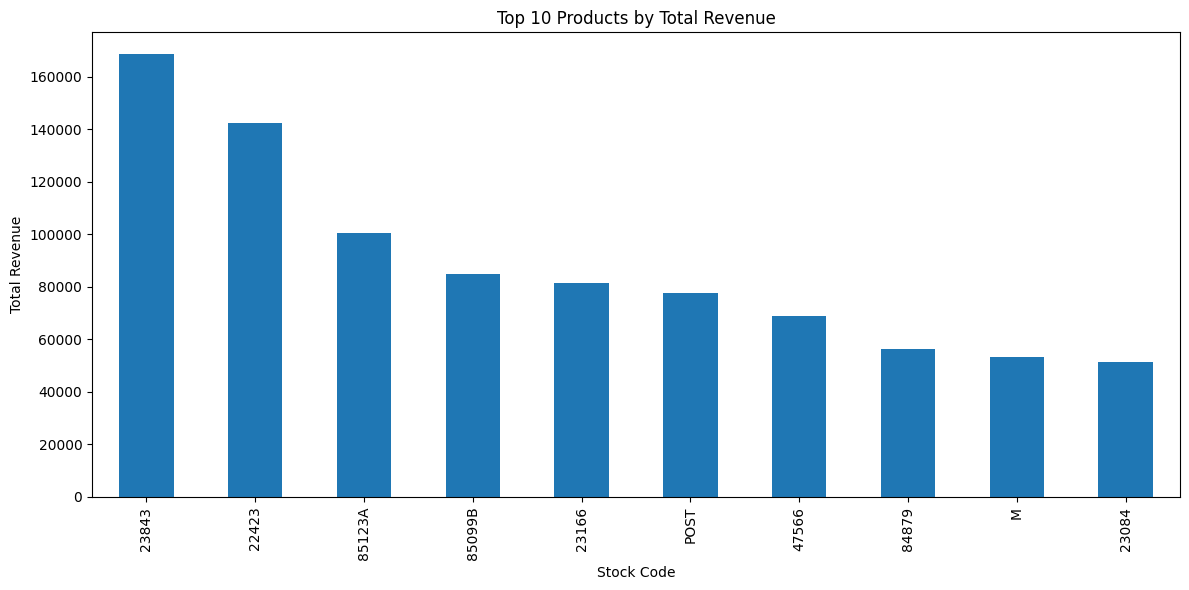

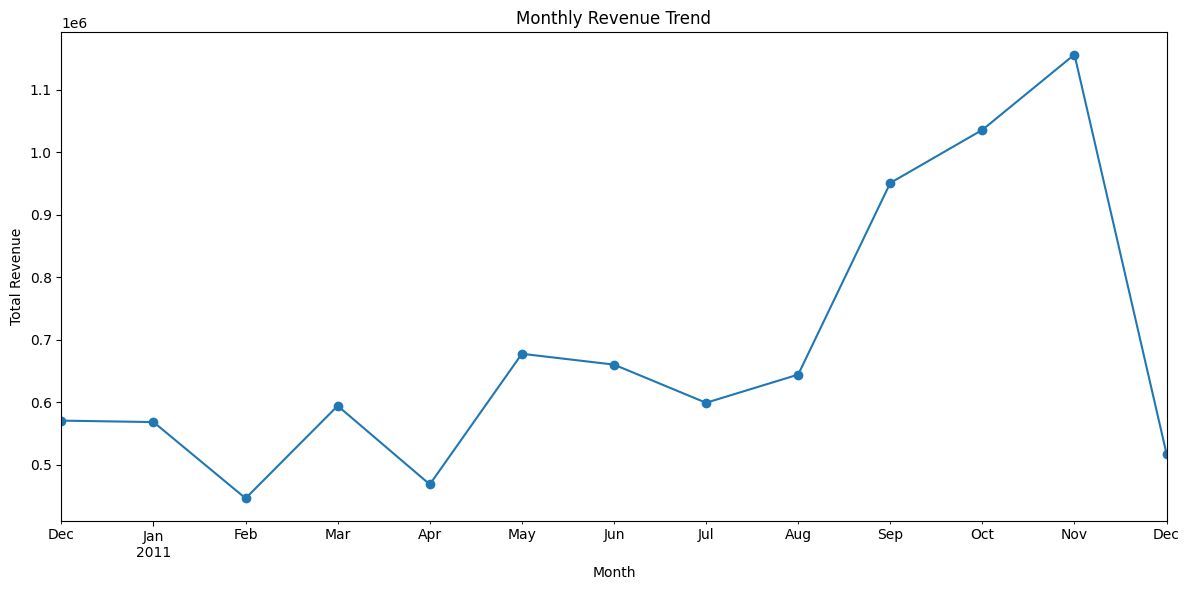

Peak sales month: 2011-11
Lowest sales month: 2011-02

Month-over-month growth rate:
Month
2010-12         NaN
2011-01   -0.004070
2011-02   -0.214779
2011-03    0.331768
2011-04   -0.211600
2011-05    0.446183
2011-06   -0.025554
2011-07   -0.092544
2011-08    0.075277
2011-09    0.476110
2011-10    0.089358
2011-11    0.116414
2011-12   -0.552683
Freq: M, Name: TotalSales, dtype: float64

Looking up a specific stock code:

    StockCode: 23843
    Description: PAPER CRAFT , LITTLE BIRDIE
    Total Quantity Sold: 80995
    Total Revenue: £168469.60
    Number of Transactions: 1
    


In [72]:
run_sales_analysis(data)

Inference

The outcome signifies the depth analysis of sales according to the dataset. Displayed the top 10 selling products by quantities. Peak Sales month is 2011-11 (November). Displayed the top 10 products based on the revenue.

Unique Orders

In [33]:
data['InvoiceNo'].nunique()

18536

In [34]:
data.sort_values('InvoiceNo').head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoicedPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
19,536367,21777,RECIPE BOX WITH METAL HEART,4,2010-12-01 08:34:00,7.95,13047,United Kingdom,31.80


# Customer Behavior Analysis

Q3. Customer Behaviour

How many unique customers are there in the dataset? What percentage of sales is driven by repeat customers?

What is the average order value (total sales per invoice)?

How does this vary across different customer segments (e.g., country-wise)?

Which countries contribute the most to sales revenue?

In [73]:
def analyze_customer_behavior(data):
    print("\n\nCustomer Behavior Analysis")
    print("===========================\n")

   # Logic for Unique customers and repeat customer sales
    unique_customers = data['CustomerID'].nunique()
    total_sales = data['Quantity'] * data['UnitPrice']
    data['TotalSales'] = total_sales

    repeat_customers = data.groupby('CustomerID').size()
    repeat_customers = repeat_customers[repeat_customers > 1].index
    repeat_customer_sales = data[data['CustomerID'].isin(repeat_customers)]['TotalSales'].sum()
    repeat_sales_percentage = (repeat_customer_sales / total_sales.sum()) * 100

    print(f"Unique Customers and Repeat Sales")
    print(f"Number of unique customers: {unique_customers}")
    print(f"Percentage of sales driven by repeat customers: {repeat_sales_percentage:.2f}%\n")

   # Logic for Average order value and variation across countries
    data['InvoiceTotal'] = data.groupby('InvoiceNo')['TotalSales'].transform('sum')
    average_order_value = data['InvoiceTotal'].mean()
    country_avg_order = data.groupby('Country')['InvoiceTotal'].mean().sort_values(ascending=False)

    print(f"Average Order Value")
    print(f"Overall average order value: £{average_order_value:.2f}")
    print("\nTop 10 countries by average order value:")
    print(country_avg_order.head(10))

    plt.figure(figsize=(12, 6))
    country_avg_order.head(10).plot(kind='bar')
    plt.title('Top 10 Countries by Average Order Value')
    plt.xlabel('Country')
    plt.ylabel('Average Order Value (£)')
    plt.tight_layout()
    plt.show()

    # Countries contributing most to sales revenue
    country_sales = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
    top_10_countries = country_sales.head(10)

    print("\nTop 10 Countries by Sales Revenue")
    print(top_10_countries)

    plt.figure(figsize=(12, 6))
    top_10_countries.plot(kind='bar')
    plt.title('Top 10 Countries by Sales Revenue')
    plt.xlabel('Country')
    plt.ylabel('Total Sales Revenue (£)')
    plt.tight_layout()
    plt.show()

In [75]:
def run_sales_analysis2(data):
    analyze_customer_behavior(data)



Customer Behavior Analysis

Unique Customers and Repeat Sales
Number of unique customers: 4339
Percentage of sales driven by repeat customers: 98.90%

 Average Order Value
Overall average order value: £746.41

Top 10 countries by average order value:
Country
Australia      8897.198294
Netherlands    7657.632717
Israel         3624.190531
Japan          2914.885483
Singapore      2629.108063
Switzerland    2239.196792
Norway         1766.808815
Sweden         1724.968600
Lebanon        1693.880000
Cyprus         1372.495539
Name: InvoiceTotal, dtype: float64


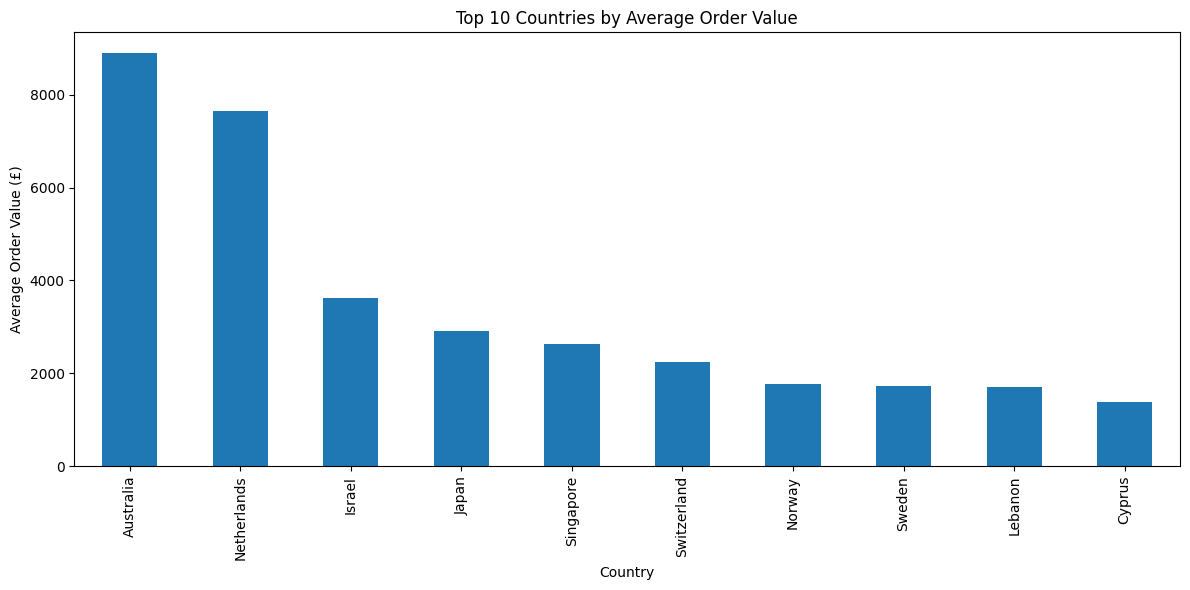


 Top 10 Countries by Sales Revenue
Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Australia          138453.810
Spain               61558.560
Switzerland         56443.950
Belgium             41196.340
Sweden              38367.830
Name: TotalSales, dtype: float64


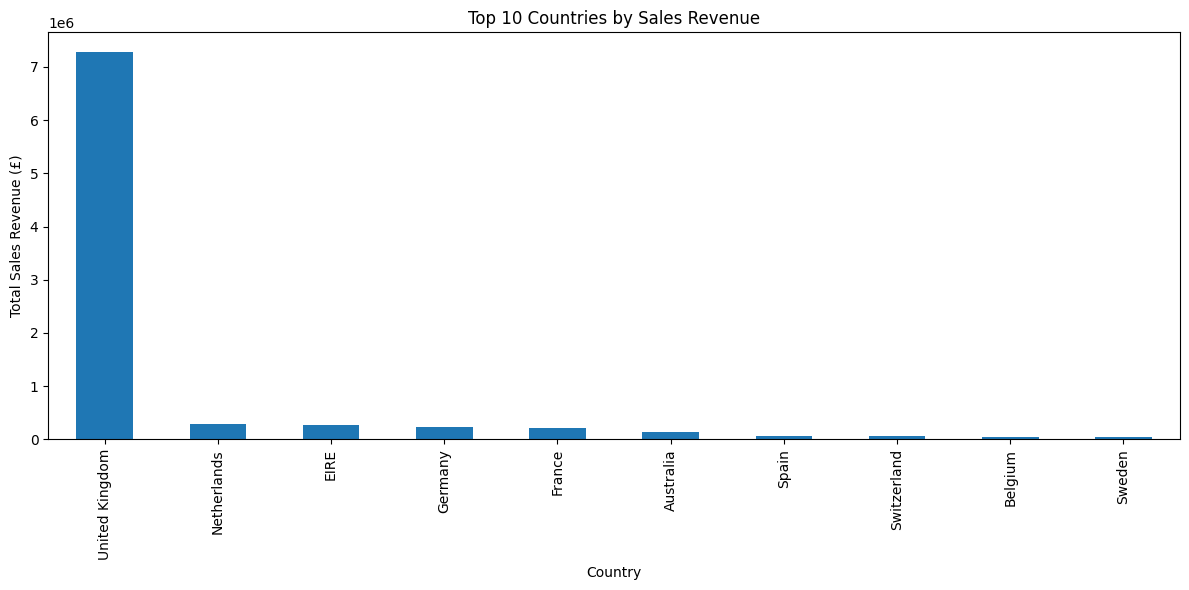

In [76]:
run_sales_analysis2(data)

Inference

Got insights after performing customer behavior analysis. No of unique customers are 4339. Australia has the highest average order value and United Kingdom has the highest sales revenue.

# Product Analysis

Q4. Product Performance

What are the top 5 countries with the highest average revenue per transaction?

Investigate if there are any specific months or seasons when certain products perform particularly well.

In [77]:
def analyze_product_performance(df):
    print("\n\nProduct Performance Analysis")
    print("=============================\n")

    # Top 5 countries with highest average revenue per transaction
    df['TotalSales'] = df['Quantity'] * df['UnitPrice']
    country_avg_revenue = df.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().groupby('Country').mean().sort_values(ascending=False)
    top_5_countries = country_avg_revenue.head(5)

    print("Top 5 countries with highest average revenue per transaction")
    print(top_5_countries)

    plt.figure(figsize=(12, 6))
    top_5_countries.plot(kind='bar')
    plt.title('Top 5 Countries by Average Revenue per Transaction')
    plt.xlabel('Country')
    plt.ylabel('Average Revenue per Transaction (£)')
    plt.tight_layout()
    plt.show()

    # Product performance by month/season
    df['Month'] = df['InvoiceDate'].dt.to_period('M')
    df['Season'] = df['InvoiceDate'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring',
                                                   4: 'Spring', 5: 'Spring', 6: 'Summer',
                                                   7: 'Summer', 8: 'Summer', 9: 'Autumn',
                                                   10: 'Autumn', 11: 'Autumn', 12: 'Winter'})

    # Monthly performance of top 5 products
    top_5_products = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(5).index
    monthly_performance = df[df['StockCode'].isin(top_5_products)].groupby(['Month', 'StockCode'])['TotalSales'].sum().unstack()

    plt.figure(figsize=(15, 8))
    monthly_performance.plot(marker='o')
    plt.title('Monthly Performance of Top 5 Products')
    plt.xlabel('Month')
    plt.ylabel('Total Sales (£)')
    plt.legend(title='StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Seasonal performance of top 5 products
    seasonal_performance = df[df['StockCode'].isin(top_5_products)].groupby(['Season', 'StockCode'])['TotalSales'].sum().unstack()

    plt.figure(figsize=(12, 6))
    seasonal_performance.plot(kind='bar', width=0.8)
    plt.title('Seasonal Performance of Top 5 Products')
    plt.xlabel('Season')
    plt.ylabel('Total Sales (£)')
    plt.legend(title='StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    print("\nProduct performance by month and season")
    print("Monthly performance of top 5 products:")
    print(monthly_performance)
    print("\nSeasonal performance of top 5 products:")
    print(seasonal_performance)

In [78]:
def run_sales_analysis3(data):
    analyze_product_performance(data)



Product Performance Analysis

Top 5 countries with highest average revenue per transaction
Country
Singapore      3039.898571
Netherlands    3004.698316
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Name: TotalSales, dtype: float64


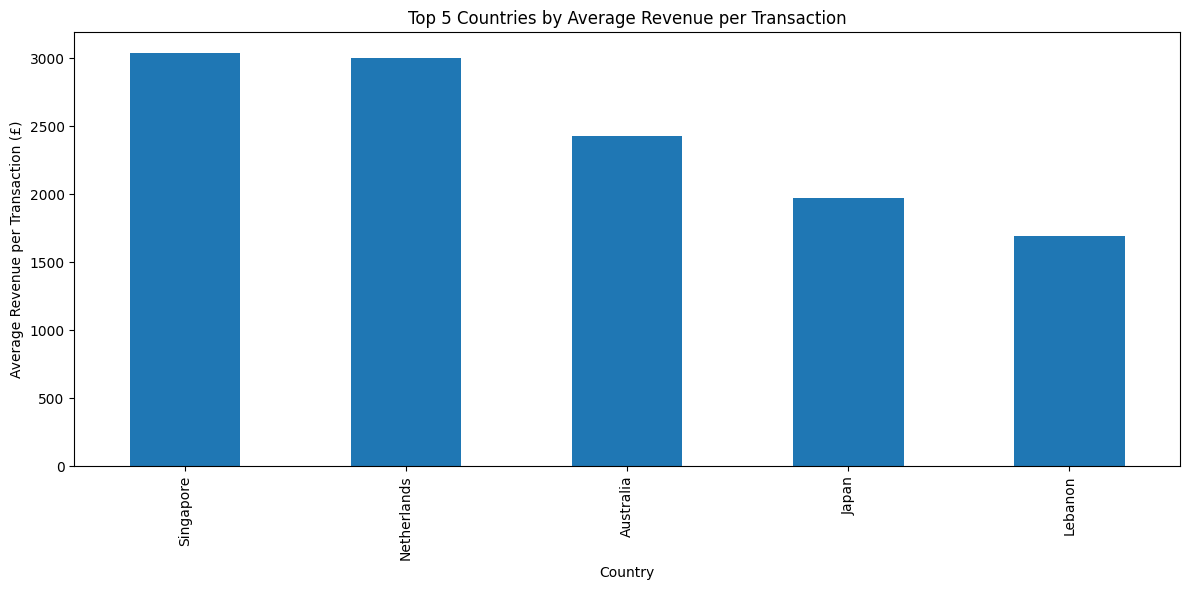

<Figure size 1500x800 with 0 Axes>

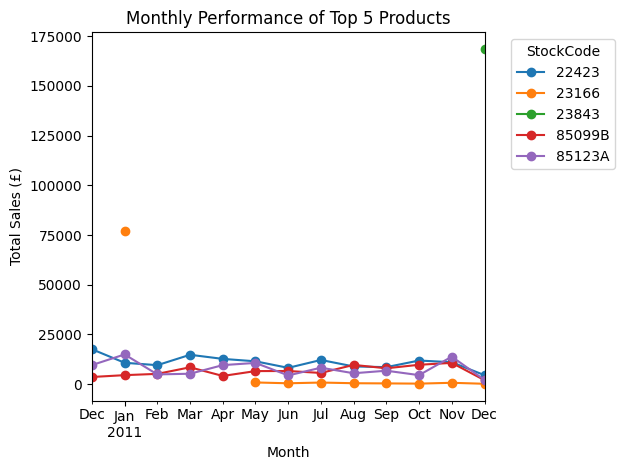

<Figure size 1200x600 with 0 Axes>

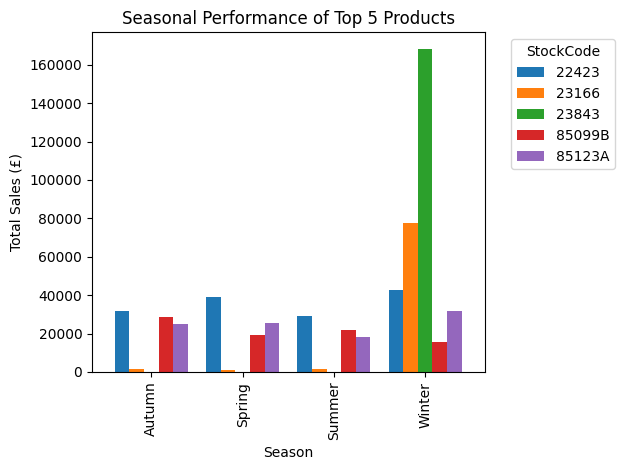


Product performance by month and season
Monthly performance of top 5 products:
StockCode     22423     23166     23843    85099B    85123A
Month                                                      
2010-12    17581.50       NaN       NaN   3619.20   9602.05
2011-01    10765.50  77183.60       NaN   4542.75  14962.05
2011-02     9559.65       NaN       NaN   5191.05   4912.65
2011-03    14784.65       NaN       NaN   8496.88   5262.50
2011-04    12721.50       NaN       NaN   4141.78   9581.65
2011-05    11503.60    869.04       NaN   6585.20  10700.42
2011-06     8216.35    458.51       NaN   6628.42   4401.90
2011-07    12174.00    826.94       NaN   5654.60   8295.12
2011-08     8921.70    486.09       NaN   9697.44   5498.10
2011-09     8570.13    397.26       NaN   7987.85   6777.20
2011-10    11895.15    283.67       NaN   9763.06   4552.74
2011-11    11038.74    708.11       NaN  10711.91  13849.93
2011-12     4532.28    203.51  168469.6   2020.40   2151.14

Seasonal performanc

In [79]:
run_sales_analysis3(data)

Inference

Singapore has the highest average revenue per transaction. Winter season has the good sales.

# Conclusion

Insights had been gained after perform analysis for the online retail dataset. Data preprocessing is done at first. Next sales, customer, product analysis has been done to get proper insights about the data.